# Classification - Support Vector Machines (SVM)

- Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# use seaborn plotting defaults
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
from sklearn.datasets.samples_generator import make_blobs

In [3]:
# default n_features = 2

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

In [4]:
X[0:5,]

array([[1.41281595, 1.5303347 ],
       [1.81336135, 1.6311307 ],
       [1.43289271, 4.37679234],
       [1.87271752, 4.18069237],
       [2.09517785, 1.0791468 ]])

In [5]:
y[0:5]

array([1, 1, 0, 0, 1])

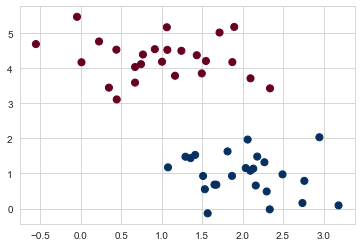

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

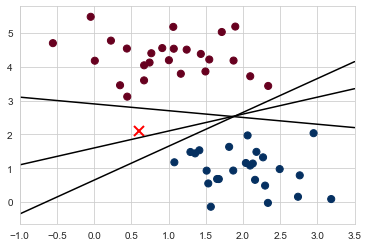

In [7]:
# Draw a line separating the data - more than one possible lines
# Sample lines  (y = mx + b)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

Depending on which line you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label

Support Vector Machines - Maximizing the Margin

Rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point.

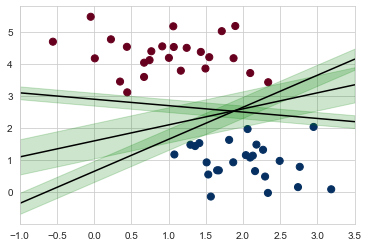

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='g', alpha=0.2)

plt.xlim(-1, 3.5);

In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. 

Support vector machines are an example of such a maximum margin estimator.

In [9]:
from sklearn.svm import SVC    # "Support vector classifier"

In [10]:
model = SVC(kernel='linear')

model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [11]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [12]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], 
               alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolors='g');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

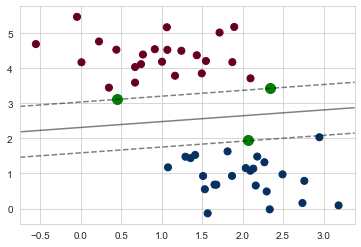

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

plot_svc_decision_function(model);

In [14]:
from sklearn.datasets.samples_generator import make_circles

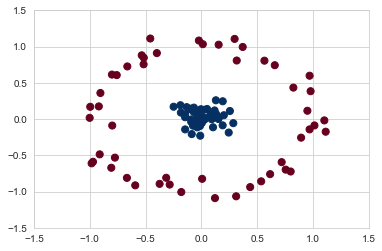

In [15]:
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5);

In [16]:
# Linear kernel will not work

model2 = SVC(kernel='linear').fit(X, y)

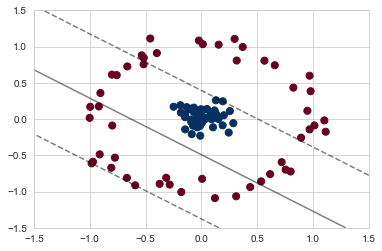

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plot_svc_decision_function(model2, plot_support=False);

In Scikit-Learn, we can apply kernelized SVM simply by changing our linear kernel to an RBF (radial basis function) kernel, using the kernel model hyperparameter:

In [18]:
model3 = SVC(kernel='rbf', C=1E6, gamma='auto')
model3.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

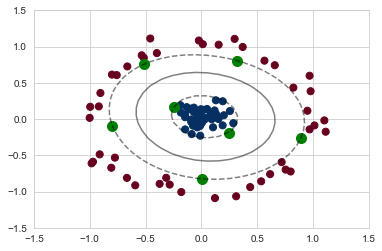

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plot_svc_decision_function(model3)

In [20]:
model3.support_vectors_

array([[ 0.31699787,  0.80802825],
       [-0.51743166,  0.75565398],
       [ 0.00704766, -0.82416954],
       [-0.79857604, -0.08909288],
       [ 0.89388963, -0.25615526],
       [ 0.24515375, -0.18593273],
       [-0.24861177,  0.17046922]])

# Case Study - Face Recognition

In [21]:
from sklearn.datasets import fetch_lfw_people

In [22]:
faces = fetch_lfw_people(min_faces_per_person=70)

In [23]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 62, 47)


In [24]:
faces.images[0].shape

(62, 47)

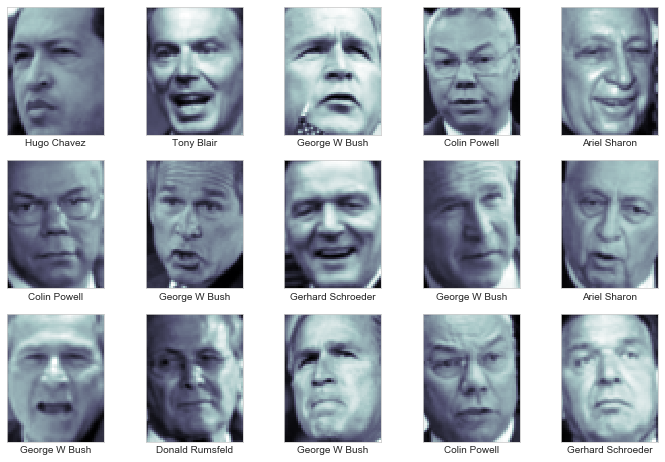

In [25]:
# Plot a few of the faces

fig, ax = plt.subplots(3, 5, figsize=(12,8))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels. Not effective to use each pixel value as a feature.
We will use a principal component analysis  to extract 150 fundamental components to feed into our support vector machine classifier

In [26]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

In [27]:
pca = PCA(n_components=150, svd_solver='randomized', whiten=True)

svc = SVC(kernel='rbf',  gamma=0.005, C=1000, class_weight='balanced')


model = Pipeline([('pca', pca),
                     ('svc', svc)])

For testing the classifier output, we will split the data into a training and testing set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)  # default test_size 0.25

In [30]:
np.unique(faces.target)

array([0, 1, 2, 3, 4, 5, 6])

In [31]:
model.fit(Xtrain, ytrain)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=None, svd_solver='randomized', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.005,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [32]:
yfit = model.predict(Xtest)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(ytest, yfit)

array([[  7,   1,   0,   5,   0,   0,   0],
       [  1,  53,   1,   5,   0,   0,   0],
       [  0,   2,  17,   8,   0,   0,   0],
       [  0,   3,   0, 143,   0,   0,   0],
       [  0,   1,   0,   3,  20,   0,   1],
       [  0,   4,   0,   4,   1,   6,   0],
       [  0,   1,   1,   5,   0,   0,  29]])

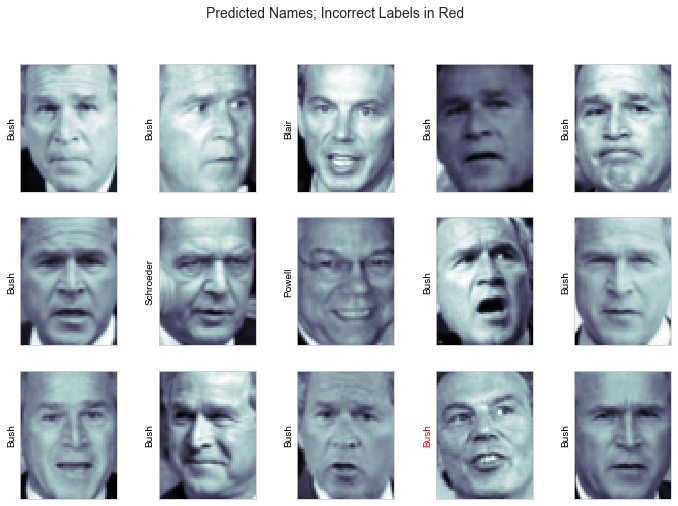

In [35]:
fig, ax = plt.subplots(3, 5, figsize=(12,8))

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

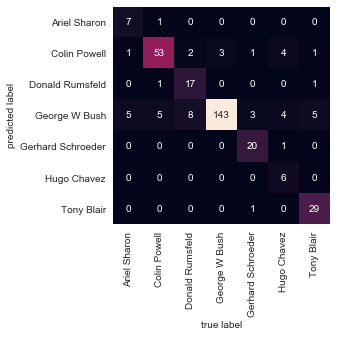

In [55]:
class WorkingHeatmap():
    def __init__(self, xlabel, ylabel):
        self.xlabel = xlabel
        self.ylabel = ylabel

    def plot(self,
        data, vmin=None, vmax=None, cmap=None, center=None, robust=False,
        annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white',
        cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto',
        yticklabels='auto', mask=None, ax=None, **kwargs):


        sns.heatmap(
            data, vmin, vmax, cmap, center, robust,
            annot, fmt, annot_kws, linewidths, linecolor,
            cbar, cbar_kws, cbar_ax, square, xticklabels,
            yticklabels, mask, ax, **kwargs)
        plt.xlabel(self.xlabel)
        plt.ylabel(self.ylabel);

        bottom_y, top_y = plt.ylim() 
        bottom_y += 0.5 
        top_y -= 0.5 
        plt.ylim(bottom_y, top_y)
        plt.show()    

mat = confusion_matrix(ytest, yfit)

heatmap = WorkingHeatmap(xlabel='true label', ylabel='predicted label')
heatmap.plot(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)

# GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
Xtrain_pca = pca.transform(Xtrain)

In [39]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5)  # 5 Fold cross validation

In [40]:
clf = clf.fit(Xtrain_pca, ytrain)

In [41]:
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### PCA - # of features

In [42]:
pca = PCA(n_components=10, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

In [43]:
components = pca.transform(faces.data)
projected  = pca.inverse_transform(components)

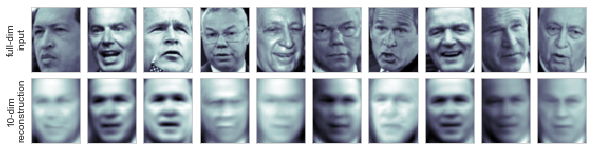

In [44]:
# Plot the results

fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='bone')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='bone')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('10-dim\nreconstruction');

In [45]:
pca.explained_variance_ratio_

array([0.18415724, 0.1474063 , 0.07128289, 0.05923916, 0.05049095,
       0.03009569, 0.02451011, 0.02092452, 0.02018107, 0.0189606 ],
      dtype=float32)

In [46]:
np.cumsum(pca.explained_variance_ratio_)

array([0.18415724, 0.33156353, 0.40284643, 0.4620856 , 0.5125766 ,
       0.5426723 , 0.56718236, 0.5881069 , 0.60828793, 0.6272485 ],
      dtype=float32)

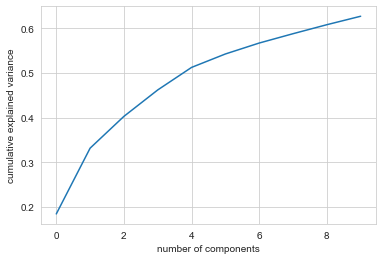

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [48]:
pca = PCA(n_components=250, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=250, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

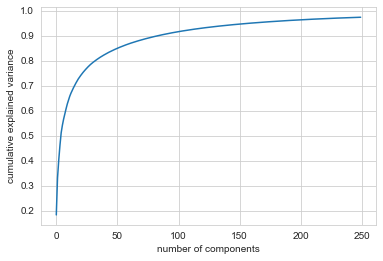

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [50]:
components = pca.transform(faces.data)
projected  = pca.inverse_transform(components)

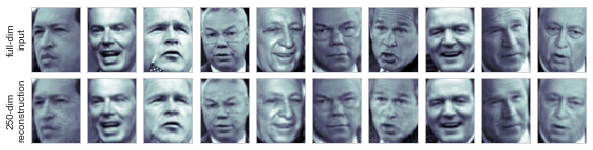

In [51]:
# Plot the results

fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='bone')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='bone')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('250-dim\nreconstruction');